# Homework-1_Problem-3a (Standardization)

### Objective: Repeat problem 2a(Standardization), this time by adding parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  

### Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 a. 

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     # Data Visualisation
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading from table
housing = pd.read_csv("/content/gdrive/MyDrive/Datasets/Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
m = len(housing)
m

545

In [ ]:
housing.shape

(545, 13)

In [ ]:
# List of variables to map (string to numerical values)
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
           
# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# We specify random seed so that the train and test data set always have the same rows, respectively
np.random.seed(0)
# split 80% as training set and 20% as testing set
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

df_train.shape

(436, 13)

In [ ]:
df_test.shape

(109, 13)

In [ ]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
22,8050,3,1,1,1,8645000
41,6360,3,2,4,0,7840000
91,6750,2,1,1,2,6419000
118,6420,3,1,1,0,5950000
472,3630,4,1,2,3,3010000


In [ ]:
df_Newtrain.shape

(436, 6)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()   # input Standardization
# scaler = MinMaxScaler()   
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtrain.head(10)

,area,bedrooms,bathrooms,stories,parking,price
22,1.351873,0.078679,-0.579897,-0.929023,0.311484,2.063847
41,0.565326,0.078679,1.410929,2.474792,-0.849261,1.632233
91,0.746837,-1.293483,-0.579897,-0.929023,1.472229,0.870342
118,0.593251,0.078679,-0.579897,-0.929023,-0.849261,0.618880
472,-0.705249,1.450841,-0.579897,0.205582,2.632974,-0.957447
344,-0.602858,-1.293483,-0.579897,-0.929023,-0.849261,-0.507067
1,1.775398,1.450841,5.392582,2.474792,2.632974,3.996723
257,1.444955,0.078679,-0.579897,-0.929023,-0.849261,-0.169283
184,-0.998458,0.078679,1.410929,0.205582,-0.849261,0.168501
275,-0.518153,-1.293483,-0.579897,-0.929023,-0.849261,-0.255606


In [ ]:
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])
df_Newtest.head(10)

,area,bedrooms,bathrooms,stories,parking,price
265,-1.020953,-0.072023,-0.531775,0.308415,-0.643743,-0.131863
54,0.369177,-0.072023,1.466964,0.308415,0.545545,1.436782
171,2.271249,-0.072023,-0.531775,-0.936669,0.545545,0.318983
244,0.066200,-0.072023,-0.531775,0.308415,-0.643743,-0.053617
268,-0.098656,1.236396,-0.531775,0.308415,-0.643743,-0.143041
231,-0.379355,-0.072023,-0.531775,-0.936669,-0.643743,0.020903
25,0.609776,1.236396,1.466964,0.308415,1.734832,2.070202
169,0.609776,1.236396,1.466964,0.308415,-0.643743,0.318983
494,0.725620,-1.380442,-0.531775,-0.936669,-0.643743,-1.022376
120,0.609776,-0.072023,-0.531775,-0.936669,1.734832,0.691583


In [ ]:
y_Newtrain = df_Newtrain.pop('price')
X_Newtrain = df_Newtrain

In [ ]:
X_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking
22,1.351873,0.078679,-0.579897,-0.929023,0.311484
41,0.565326,0.078679,1.410929,2.474792,-0.849261
91,0.746837,-1.293483,-0.579897,-0.929023,1.472229
118,0.593251,0.078679,-0.579897,-0.929023,-0.849261
472,-0.705249,1.450841,-0.579897,0.205582,2.632974


In [ ]:
y_Newtrain.head()

22     2.063847
41     1.632233
91     0.870342
118    0.618880
472   -0.957447
Name: price, dtype: float64

In [ ]:
y = y_Newtrain.values
print('y = ', y[: 10])

y =  [ 2.06384653  1.63223323  0.87034193  0.61888027 -0.95744656 -0.50706746
  3.99672347 -0.16928314  0.16850118 -0.2556058 ]


In [ ]:
# preparing the training set

X1 = df_Newtrain.values[:, 0]     # getting input value from first column and putting in Variable-1 (X1)   
X2 = df_Newtrain.values[:, 1]     # getting input value from first column and putting in Variable-2 (X2)          
X3 = df_Newtrain.values[:, 2]     # getting input value from first column and putting in Variable-3 (X3)           
X4 = df_Newtrain.values[:, 3]     # getting input value from first column and putting in Variable-4 (X4)          
X5 = df_Newtrain.values[:, 4]     # getting input value from first column and putting in Variable-5 (X5)

# print first 10 values from each variable

print('X1 = ', X1[: 10]) 
print('X2 = ', X2[: 10])
print('X3 = ', X3[: 10])
print('X4 = ', X4[: 10])
print('X5 = ', X5[: 10])

X1 =  [ 1.35187274  0.56532627  0.746837    0.593251   -0.7052488  -0.60285813
  1.77539777  1.44495517 -0.99845843 -0.51815313]
X2 =  [ 0.07867901  0.07867901 -1.29348292  0.07867901  1.45084094 -1.29348292
  1.45084094  0.07867901  0.07867901 -1.29348292]
X3 =  [-0.57989658  1.41092949 -0.57989658 -0.57989658 -0.57989658 -0.57989658
  5.39258163 -0.57989658  1.41092949 -0.57989658]
X4 =  [-0.92902305  2.4747925  -0.92902305 -0.92902305  0.20558213 -0.92902305
  2.4747925  -0.92902305  0.20558213 -0.92902305]
X5 =  [ 0.31148433 -0.8492607   1.47222936 -0.8492607   2.6329744  -0.8492607
  2.6329744  -0.8492607  -0.8492607  -0.8492607 ]


In [ ]:
m = len(X_Newtrain)         # size of training set
X_0 = np.ones((m, 1))       # Creating a single column matrix (X_0) of training set size, contains all ones 
X_0 [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
# Converting 1D arrays of X1, X2, X3, X4 and X5 to 2D arrays
X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
X_4 = X4.reshape(m, 1)
X_5 = X5.reshape(m, 1)

# print first 5 values from each 2D array
print('X_1 = ', X_1[: 5])
print('X_2 = ', X_2[: 5])
print('X_3 = ', X_3[: 5])
print('X_4 = ', X_4[: 5])
print('X_5 = ', X_5[: 5])

X_1 =  [[ 1.35187274]
 [ 0.56532627]
 [ 0.746837  ]
 [ 0.593251  ]
 [-0.7052488 ]]
X_2 =  [[ 0.07867901]
 [ 0.07867901]
 [-1.29348292]
 [ 0.07867901]
 [ 1.45084094]]
X_3 =  [[-0.57989658]
 [ 1.41092949]
 [-0.57989658]
 [-0.57989658]
 [-0.57989658]]
X_4 =  [[-0.92902305]
 [ 2.4747925 ]
 [-0.92902305]
 [-0.92902305]
 [ 0.20558213]]
X_5 =  [[ 0.31148433]
 [-0.8492607 ]
 [ 1.47222936]
 [-0.8492607 ]
 [ 2.6329744 ]]


In [ ]:
# Stacking X_0, X_1, X_2, X_3, X-4 and X_5 horizotally
# This is the final X Matrix for training

X = np.hstack((X_0, X_1, X_2, X_3, X_4, X_5))
X [: 5]

array([[ 1.        ,  1.35187274,  0.07867901, -0.57989658, -0.92902305,
         0.31148433],
       [ 1.        ,  0.56532627,  0.07867901,  1.41092949,  2.4747925 ,
        -0.8492607 ],
       [ 1.        ,  0.746837  , -1.29348292, -0.57989658, -0.92902305,
         1.47222936],
       [ 1.        ,  0.593251  ,  0.07867901, -0.57989658, -0.92902305,
        -0.8492607 ],
       [ 1.        , -0.7052488 ,  1.45084094, -0.57989658,  0.20558213,
         2.6329744 ]])

In [ ]:
theta = np.zeros(6)
theta

array([0., 0., 0., 0., 0., 0.])

In [ ]:
y_Newtest = df_Newtest.pop('price')
X_Newtest = df_Newtest

In [ ]:
X_Newtest.head()

,area,bedrooms,bathrooms,stories,parking
265,-1.020953,-0.072023,-0.531775,0.308415,-0.643743
54,0.369177,-0.072023,1.466964,0.308415,0.545545
171,2.271249,-0.072023,-0.531775,-0.936669,0.545545
244,0.066200,-0.072023,-0.531775,0.308415,-0.643743
268,-0.098656,1.236396,-0.531775,0.308415,-0.643743


In [ ]:
y_Newtest.head()

265   -0.131863
54     1.436782
171    0.318983
244   -0.053617
268   -0.143041
Name: price, dtype: float64

In [ ]:
y_test = y_Newtest.values
print('y_test = ', y_test[: 10])

y_test =  [-0.13186273  1.43678245  0.31898304 -0.05361677 -0.14304072  0.02090319
  2.07020212  0.31898304 -1.02237626  0.69158284]


In [ ]:
# preparing the testing/validarion set
X1_test = df_Newtest.values[:, 0]     # getting input value from first column and putting in Variable-1 (X1_test)            
X2_test = df_Newtest.values[:, 1]     # getting input value from first column and putting in Variable-2 (X2_test)            
X3_test = df_Newtest.values[:, 2]     # getting input value from first column and putting in Variable-3 (X3_test)           
X4_test = df_Newtest.values[:, 3]     # getting input value from first column and putting in Variable-4 (X4_test)           
X5_test = df_Newtest.values[:, 4]     # getting input value from first column and putting in Variable-5 (X5_test)

# print first 10 values from each variable

print('X1_test = ', X1_test[: 10]) 
print('X2_test = ', X2_test[: 10])
print('X3_test = ', X3_test[: 10])
print('X4_test = ', X4_test[: 10])
print('X5_test = ', X5_test[: 10])

X1_test =  [-1.02095327  0.3691766   2.27124853  0.06619958 -0.09865556 -0.37935486
  0.609776    0.609776    0.72562016  0.609776  ]
X2_test =  [-0.07202305 -0.07202305 -0.07202305 -0.07202305  1.23639571 -0.07202305
  1.23639571  1.23639571 -1.38044181 -0.07202305]
X3_test =  [-0.53177451  1.46696416 -0.53177451 -0.53177451 -0.53177451 -0.53177451
  1.46696416  1.46696416 -0.53177451 -0.53177451]
X4_test =  [ 0.30841537  0.30841537 -0.93666891  0.30841537  0.30841537 -0.93666891
  0.30841537  0.30841537 -0.93666891 -0.93666891]
X5_test =  [-0.64374278  0.54554473  0.54554473 -0.64374278 -0.64374278 -0.64374278
  1.73483223 -0.64374278 -0.64374278  1.73483223]


In [ ]:
m_test = len(X_Newtest)             # size of validation set
X_0_test = np.ones((m_test, 1))     # Creating a single column matrix (X_0_test) of validation set size, contains all ones
X_0_test [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
# Converting 1D arrays of validation X's to 2D arrays

X_1_test = X1_test.reshape(m_test, 1)
X_2_test = X2_test.reshape(m_test, 1)
X_3_test = X3_test.reshape(m_test, 1)
X_4_test = X4_test.reshape(m_test, 1)
X_5_test = X5_test.reshape(m_test, 1)

# print first 5 values from each 2D array
print('X_1_test = ', X_1_test[: 5])
print('X_2_test = ', X_2_test[: 5])
print('X_3_test = ', X_3_test[: 5])
print('X_4_test = ', X_4_test[: 5])
print('X_5_test = ', X_5_test[: 5])

X_1_test =  [[-1.02095327]
 [ 0.3691766 ]
 [ 2.27124853]
 [ 0.06619958]
 [-0.09865556]]
X_2_test =  [[-0.07202305]
 [-0.07202305]
 [-0.07202305]
 [-0.07202305]
 [ 1.23639571]]
X_3_test =  [[-0.53177451]
 [ 1.46696416]
 [-0.53177451]
 [-0.53177451]
 [-0.53177451]]
X_4_test =  [[ 0.30841537]
 [ 0.30841537]
 [-0.93666891]
 [ 0.30841537]
 [ 0.30841537]]
X_5_test =  [[-0.64374278]
 [ 0.54554473]
 [ 0.54554473]
 [-0.64374278]
 [-0.64374278]]


In [ ]:
# Stacking X_0_test through X_5_test horizotally
# This is the final X Matrix for validation

X_test = np.hstack((X_0_test, X_1_test, X_2_test, X_3_test, X_4_test, X_5_test))
X_test [: 5]

array([[ 1.        , -1.02095327, -0.07202305, -0.53177451,  0.30841537,
        -0.64374278],
       [ 1.        ,  0.3691766 , -0.07202305,  1.46696416,  0.30841537,
         0.54554473],
       [ 1.        ,  2.27124853, -0.07202305, -0.53177451, -0.93666891,
         0.54554473],
       [ 1.        ,  0.06619958, -0.07202305, -0.53177451,  0.30841537,
        -0.64374278],
       [ 1.        , -0.09865556,  1.23639571, -0.53177451,  0.30841537,
        -0.64374278]])

In [ ]:
# defining function for computing the cost for training set
# parameter penalty is introduced in loss function
# theta zero has not been penalized

def compute_cost(X, y, theta, m, Lambda):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    sqrTheta = np.square(theta)
    sqrTheta_new = np.delete(sqrTheta, 0)                                  # square of theta zero is excluded
    J = 1 / (2 * m) * (np.sum(sqrErrors) + Lambda * np.sum(sqrTheta_new)) 
    return J

In [ ]:
# defining function for computing the cost for validation set
# parameters are not penalized for validation set

def compute_cost_test(X_test, y_test, theta, m_test):
    predictions = X_test.dot(theta)
    errors = np.subtract(predictions, y_test)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m_test) * np.sum(sqrErrors)
    return J

In [ ]:
# defining function for gradient descent algorithm
# gradient descent algorithm is applied on the training set
# gradient descent is modified for parameter penalty
# for each iteration loss for both training and validation set is calculated

def gradient_descent(X, y, theta, alpha, iterations, Lambda):
    cost_history = np.zeros(iterations)
    cost_test = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = np.array(theta)*(parameter_penalty) - sum_delta;                      # theta is penalized
        cost_history[i] = compute_cost(X, y, theta, m, Lambda)                        # loss for training set
        cost_test[i] = compute_cost_test(X_test, y_test, theta, m_test)               # loss for validation set
    
    return theta, cost_history, cost_test

#### For learning rate 0.099 (learning rate is chosen between 0.1 and 0.01 as question asked)

In [ ]:
# to penalize theta values in gradient descent algorithm
# parameter_penalty has been introduced
# to exclude theta zero from penalizing, the first element of parameter_penalty is set to 1

theta = [0., 0., 0., 0., 0., 0.]
iterations = 500;
alpha = 0.099
Lambda = 5
p = (1 - (alpha * Lambda) / m)
parameter_penalty = np.full(shape=5, fill_value=p)
parameter_penalty = np.insert(parameter_penalty, 0, 1)

In [ ]:
# computing the cost for initial theta values

cost = compute_cost(X, y, theta, m, Lambda)
print('The initial cost for given values of theta_0 to theta_5 = ', cost)

The initial cost for given values of theta_0 to theta_5 =  0.5000000000000002


In [ ]:
# Computing final theta values and cost/losses for training and validation set

theta, cost_history, cost_test = gradient_descent(X, y, theta, alpha, iterations, Lambda)
print('Final value of theta=', theta)
print('cost_history =', cost_history)
print('cost_test =', cost_test)

Final value of theta= [6.20650320e-17 3.87465384e-01 4.48004757e-02 3.40623575e-01
 2.46257037e-01 1.53830328e-01]
cost_history = [0.41180651 0.35265536 0.31280219 0.28580089 0.26738225 0.2547148
 0.24591735 0.23973739 0.23533885 0.2321618  0.22982984 0.2280887
 0.22676565 0.22574252 0.22493781 0.22429476 0.22377342 0.22334528
 0.22298973 0.22269162 0.22243966 0.22222527 0.22204183 0.22188417
 0.22174816 0.22163046 0.22152834 0.22143958 0.22136228 0.22129486
 0.22123601 0.22118456 0.22113957 0.22110017 0.22106567 0.22103543
 0.22100891 0.22098565 0.22096523 0.22094731 0.22093157 0.22091774
 0.22090559 0.22089491 0.22088552 0.22087727 0.22087001 0.22086362
 0.220858   0.22085306 0.2208487  0.22084487 0.2208415  0.22083853
 0.22083591 0.2208336  0.22083157 0.22082978 0.22082821 0.22082682
 0.22082559 0.22082451 0.22082356 0.22082272 0.22082198 0.22082132
 0.22082075 0.22082024 0.22081979 0.22081939 0.22081904 0.22081874
 0.22081846 0.22081822 0.22081801 0.22081782 0.22081766 0.22081751
 

Text(0.5, 1.0, 'Convergence of Gradient Descent')

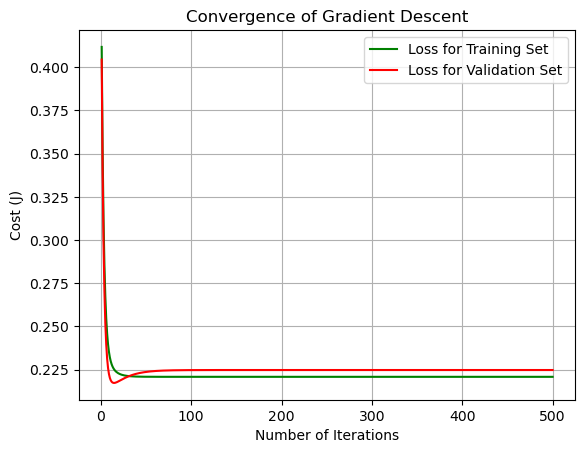

In [ ]:
plt.plot(range(1, iterations + 1),cost_history, color='green', label= 'Loss for Training Set')
plt.plot(range(1, iterations + 1),cost_test, color='red', label= 'Loss for Validation Set')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')

#### For learning rate 0.03 (learning rate is chosen between 0.1 and 0.01 as question asked)

In [ ]:
# to penalize theta values in gradient descent algorithm
# parameter_penalty has been introduced
# to exclude theta zero from penalizing, the first element of parameter_penalty is set to 1

theta003 = [0., 0., 0., 0., 0., 0.]
iterations = 500;
alpha003 = 0.03
Lambda = 5
p = (1 - (alpha * Lambda) / m)
parameter_penalty = np.full(shape=5, fill_value=p)
parameter_penalty = np.insert(parameter_penalty, 0, 1)

In [ ]:
# computing the cost for initial theta values

cost003 = compute_cost(X, y, theta003, m, Lambda)
print('The initial cost for given values of theta_0 to theta_5 = ', cost003)

The initial cost for given values of theta_0 to theta_5 =  0.5000000000000002


In [ ]:
# Computing final theta values and cost/losses for training and validation set

theta003, cost_history003, cost_test003 = gradient_descent(X, y, theta003, alpha003, iterations, Lambda)
print('Final value of theta=', theta003)
print('cost_history =', cost_history003)
print('cost_test =', cost_test003)

Final value of theta= [6.29083941e-17 3.78834664e-01 4.95844643e-02 3.33552649e-01
 2.40887249e-01 1.53225415e-01]
cost_history = [0.47141207 0.44590486 0.42313888 0.40281242 0.38465738 0.36843545
 0.3539348  0.34096714 0.32936505 0.31897968 0.30967865 0.30134425
 0.29387176 0.28716803 0.28115018 0.27574446 0.27088523 0.26651407
 0.26257895 0.25903357 0.25583666 0.25295147 0.25034527 0.24798885
 0.24585621 0.24392414 0.24217196 0.24058119 0.23913537 0.23781979
 0.2366213  0.23552817 0.23452992 0.23361716 0.2327815  0.23201544
 0.23131226 0.23066594 0.23007108 0.22952284 0.22901689 0.22854933
 0.22811666 0.22771574 0.22734373 0.22699809 0.22667652 0.22637697
 0.22609755 0.22583658 0.22559256 0.22536408 0.22514992 0.22494894
 0.22476012 0.22458252 0.2244153  0.22425768 0.22410898 0.22396855
 0.2238358  0.2237102  0.22359126 0.22347854 0.22337163 0.22327014
 0.22317373 0.22308209 0.22299491 0.22291193 0.22283289 0.22275757
 0.22268574 0.22261722 0.2225518  0.22248932 0.22242963 0.22237256

Text(0.5, 1.0, 'Convergence of Gradient Descent')

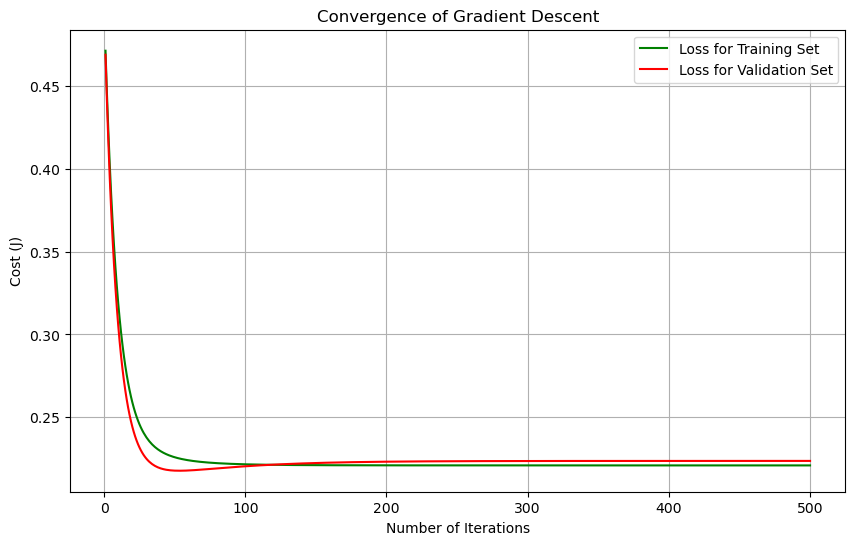

In [ ]:
plt.plot(range(1, iterations + 1),cost_history003, color='green', label= 'Loss for Training Set')
plt.plot(range(1, iterations + 1),cost_test003, color='red', label= 'Loss for Validation Set')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')

## Here, the loss and gradient functions in Problem 2a have been updated to include a regularization term for the training set. This was done by either adding a penalty term to the loss function or modifying the logic for gradient descent updates to include the penalty.

## The cost versus iteration plots, which encompass both training and evaluation losses, exhibit a similar pattern for problems 3a and 2a (with either standardization or normalization).


## Like previous,we see that for learning rate 0.099, convergence is faster. Also compared to nomalization ( code is in Homework-1_Problem-3a (Normalization)), cost is higher at the same iteration for standardization. So, normalization shows better performance than standardization.

